In [116]:
#In this file, I will do some initial visualization of the categorical variables using seaborn and violin plots and
#then will finish preprocessing by normalizing each of the columns in the dataframe using min-max normalization
#and then go on to visualize the numerical data 1) generally for all position players and then 2) by each position. 
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
stats = pd.read_csv('/content/drive/MyDrive/Data_Science_Projects/Stats_with_categorical.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Text(0.5, 1.0, 'Salary vs. Age')

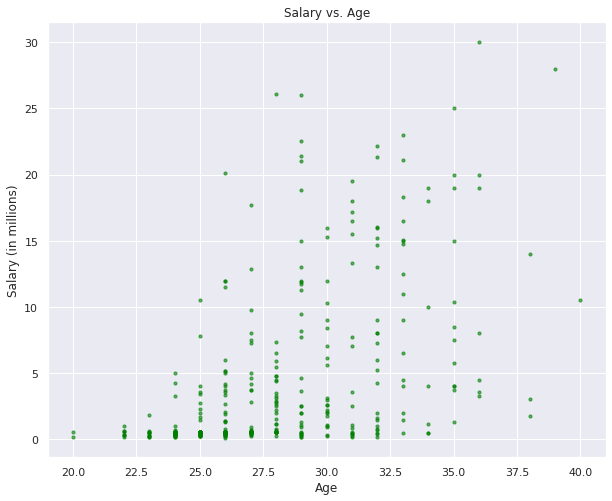

In [117]:
import matplotlib.pyplot as plt
import numpy as np

x= stats['age']
y = stats['salary']
plt_1 = plt.figure(figsize=(10,8))
plt.scatter(x,y,s=10, alpha = 0.6, color = 'green')
plt.xlabel('Age')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. Age')

Text(0.5, 1.0, 'Salary vs. Rookie contract')

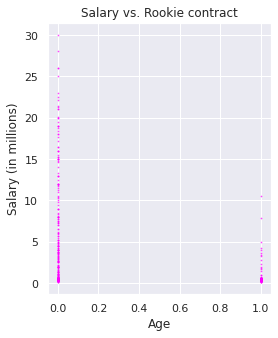

In [118]:
x= stats['Rookie contract']
y = stats['salary']
plt_2 = plt.figure(figsize=(4,5))
plt.scatter(x,y,s=.6, alpha = 0.6, color = 'magenta')
plt.xlabel('Age')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. Rookie contract')

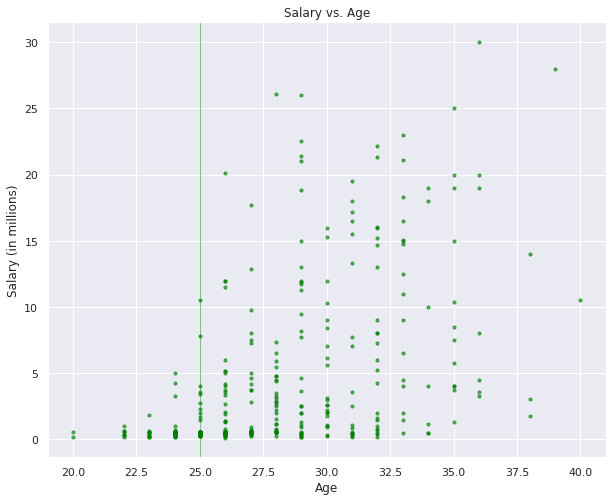

In [119]:
#Plot of salary vs. age with line at dividing line for rookie contracts of age 25
x= stats['age']
y = stats['salary']
plt_3 = plt.figure(figsize=(10,8))
plt.scatter(x,y,s=10, alpha = 0.6, color = 'green')
plt.xlabel('Age')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. Age')
plt.axvline(x=25, color = 'green', linewidth = 0.5)

Text(0.5, 0, 'Salary (millions)')

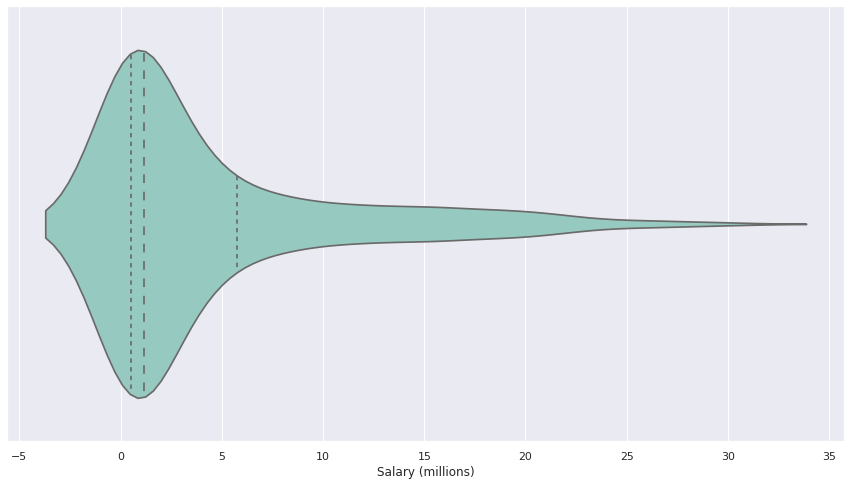

In [120]:
import seaborn as sns
#Visualize the distribution of MLB position player salaries using the violin plot. The quartiles are shown by the dotted lines. In the
#cells after this, I will visualize the distribution of other features within the dataset as well.
sns.set_theme(style = 'whitegrid')
sns.set(rc = {'figure.figsize':(15, 8)})
ax = sns.violinplot(x = stats['salary'], palette = 'Set3',inner = 'quartile', linewidth = 1.7)
ax.set_xlabel('Salary (millions)')

Text(0.5, 0, 'Salary (millions)')

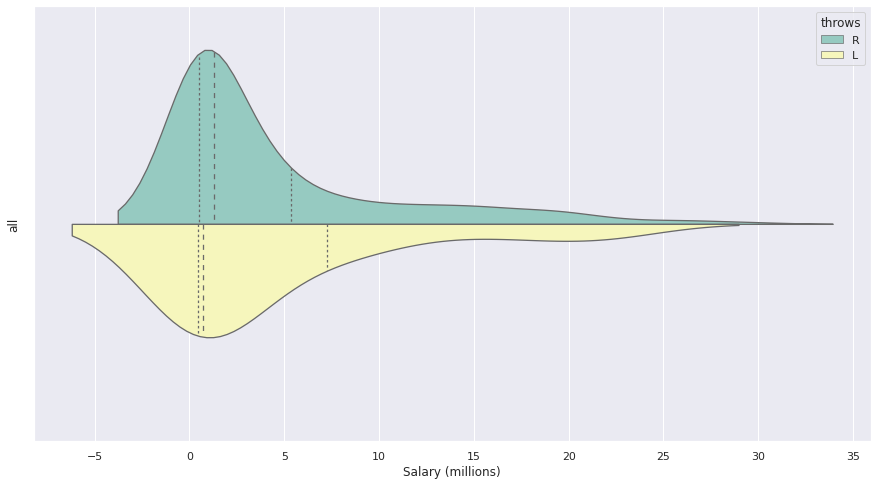

In [121]:
sns.set_theme(style = 'whitegrid')
sns.set(rc = {'figure.figsize':(15, 8)})
stats['all'] = ''
ax = sns.violinplot(x = stats['salary'], y = stats['all'], hue = stats['throws'], split = True, palette = 'Set3',inner = 'quartile', linewidth = 1.3)
ax.set_xlabel('Salary (millions)')

Text(0.5, 0, 'Salary (millions)')

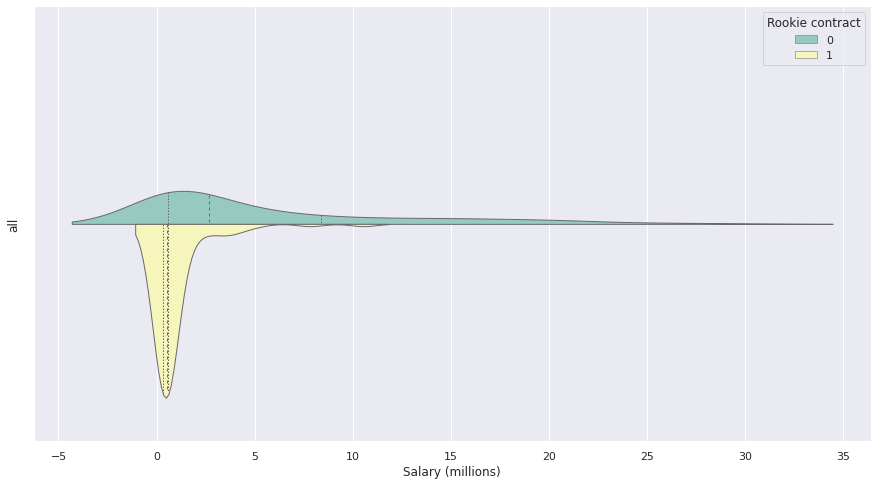

In [122]:
sns.set_theme(style = 'whitegrid')
sns.set(rc = {'figure.figsize':(15, 8)})
ax = sns.violinplot(x = stats['salary'], y = stats['all'], hue = stats['Rookie contract'], split = True, palette = 'Set3',inner = 'quartile', linewidth = 1)
ax.set_xlabel('Salary (millions)')

Text(0.5, 0, 'Salary (millions)')

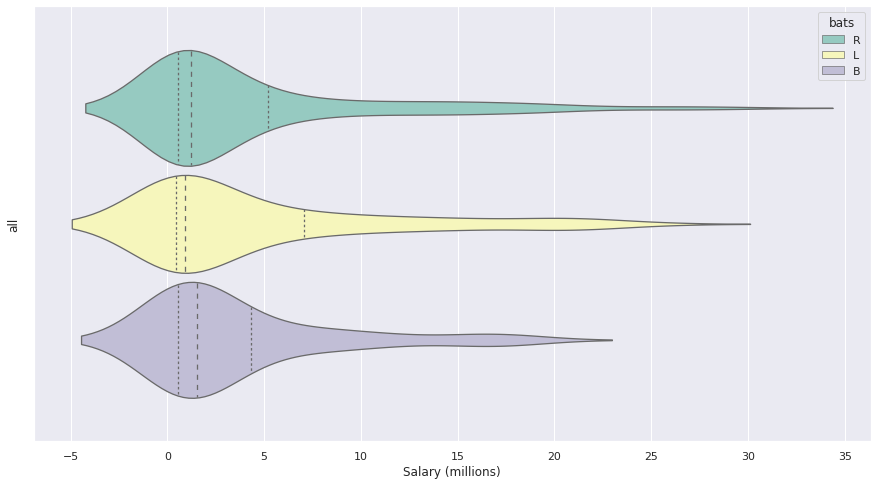

In [123]:
sns.set_theme(style = 'whitegrid')
sns.set(rc = {'figure.figsize':(15, 8)})
ax = sns.violinplot(x = stats['salary'], y = stats['all'], hue = stats['bats'], palette = 'Set3',inner = 'quartile', linewidth = 1.3)
ax.set_xlabel('Salary (millions)')

Text(0.5, 0, 'ops')

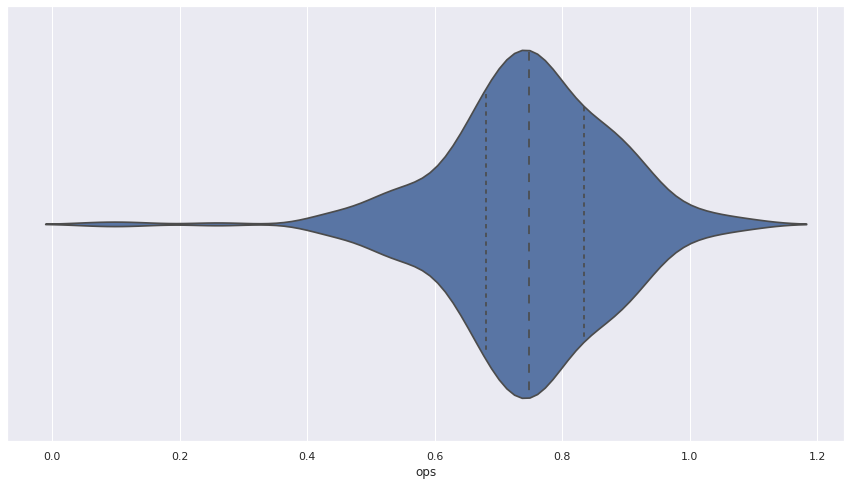

In [124]:
sns.set_theme(style = 'whitegrid')
sns.set(rc = {'figure.figsize':(15, 8)})
ax = sns.violinplot(x = stats['ops'], pallete = 'Set3',inner = 'quart', linewidth = 1.7)
ax.set_xlabel('ops')

Text(0.5, 0, 'Wins Above Replacement')

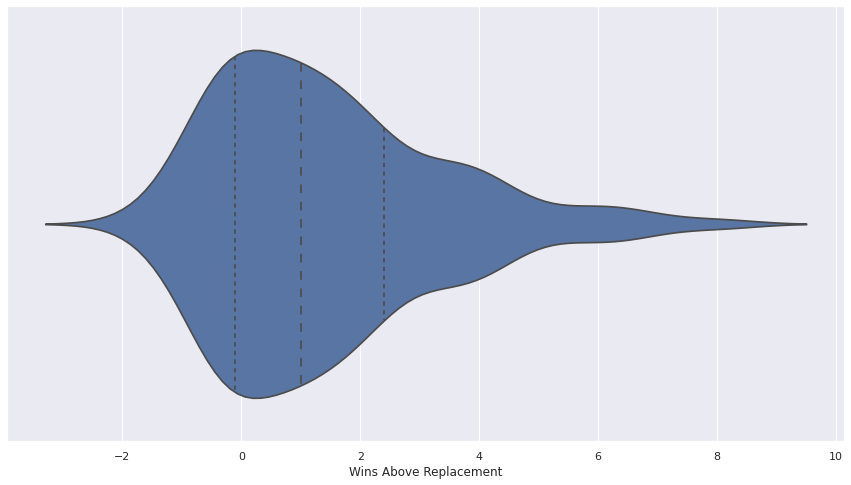

In [125]:
sns.set_theme(style = 'whitegrid')
sns.set(rc = {'figure.figsize':(15, 8)})
ax = sns.violinplot(x = stats['WAR'], pallete = 'Set2',inner = 'quart', linewidth = 1.7)
ax.set_xlabel('Wins Above Replacement')

Text(0.5, 0, 'Hits')

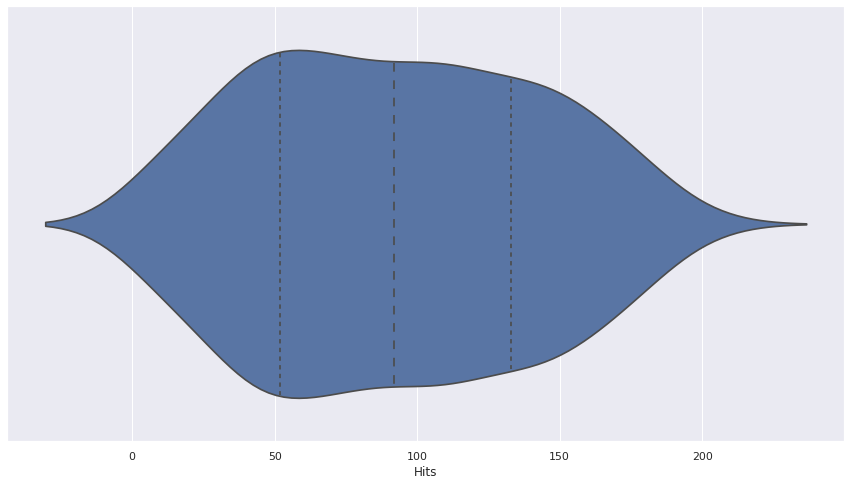

In [126]:
sns.set_theme(style = 'whitegrid')
sns.set(rc = {'figure.figsize':(15, 8)})
ax = sns.violinplot(x = stats['H'], pallete = 'Set2',inner = 'quart', linewidth = 1.7)
ax.set_xlabel('Hits')

Text(0.5, 0, 'Runs Batted In')

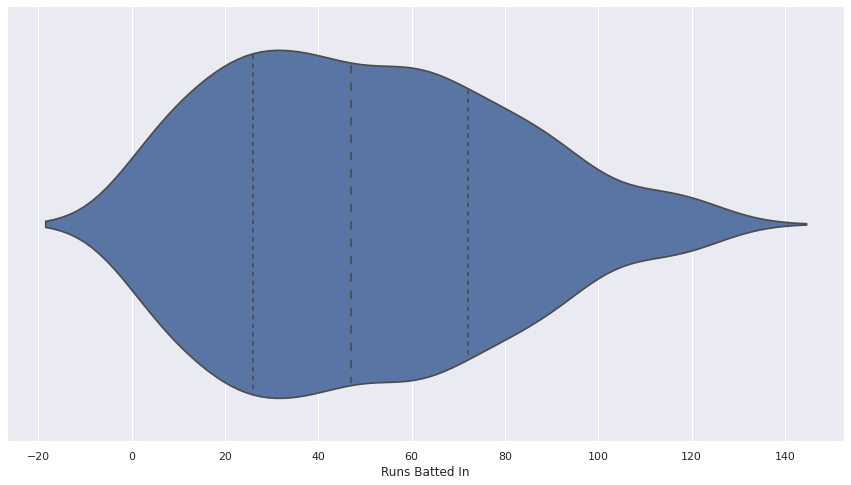

In [127]:
sns.set_theme(style = 'whitegrid')
sns.set(rc = {'figure.figsize':(15, 8)})
ax = sns.violinplot(x = stats['RBI'], pallete = 'Set2',inner = 'quart', linewidth = 1.7)
ax.set_xlabel('Runs Batted In')

Text(0.5, 0, 'Homeruns')

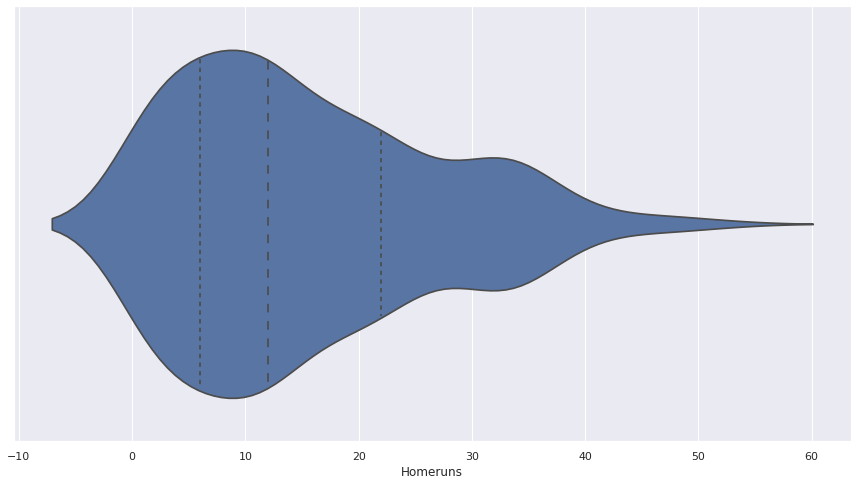

In [128]:
sns.set_theme(style = 'whitegrid')
sns.set(rc = {'figure.figsize':(15, 8)})
ax = sns.violinplot(x = stats['HR'], pallete = 'Set2',inner = 'quart', linewidth = 1.7)
ax.set_xlabel('Homeruns')

Text(0.5, 0, 'Stolen Bases')

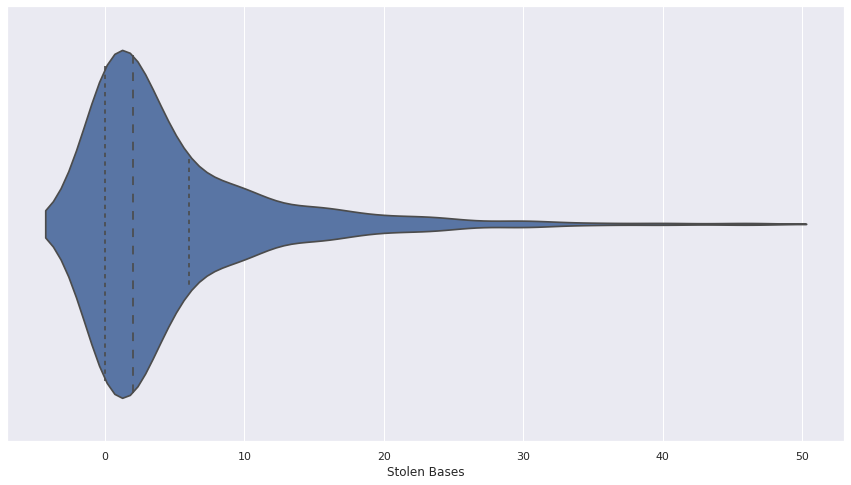

In [129]:
sns.set_theme(style = 'whitegrid')
sns.set(rc = {'figure.figsize':(15, 8)})
ax = sns.violinplot(x = stats['SB'], pallete = 'Set2',inner = 'quart', linewidth = 1.7)
ax.set_xlabel('Stolen Bases')

Text(0.5, 0, 'Strikeouts')

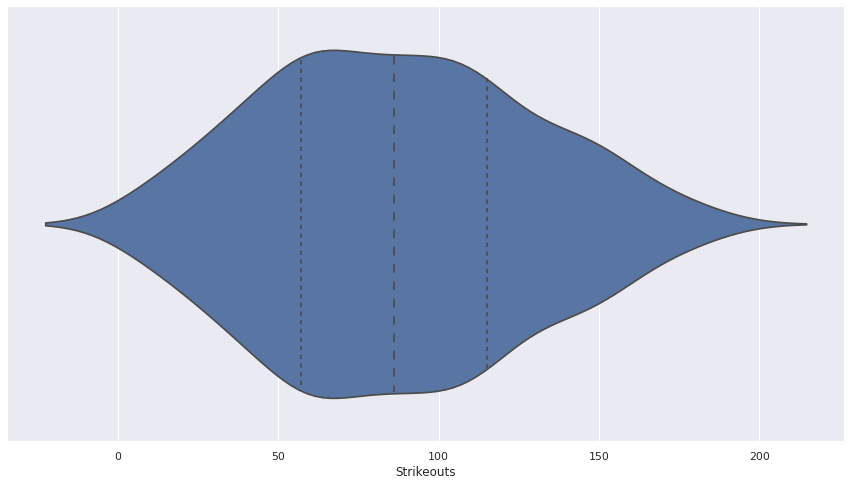

In [130]:
sns.set_theme(style = 'whitegrid')
sns.set(rc = {'figure.figsize':(15, 8)})
ax = sns.violinplot(x = stats['SO'], pallete = 'Set2',inner = 'quart', linewidth = 1.7)
ax.set_xlabel('Strikeouts')

In [131]:
#Use seaborn library's violin plot to get a examine how some of the categorical variables relate to salary and their distributions

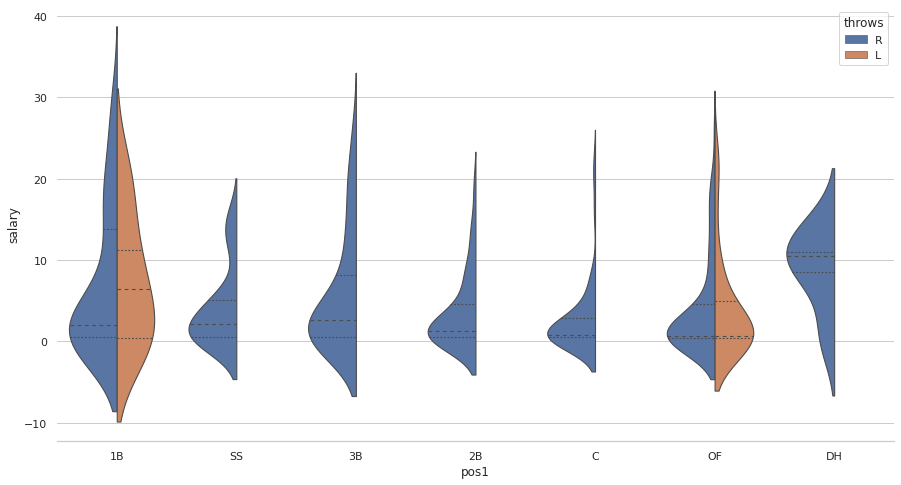

In [132]:
#Use seaborn violin plot for a preliminary visualization of MLB salaries by position.
#The blue half is for right handed hitters while the orange half represents lefties.
sns.set_theme(style= "whitegrid")
ax = sns.violinplot(x = stats['pos1'], y = stats['salary'], hue = stats['throws'],
                    split = True, inner = 'quart', linewidth = 1.1)
sns.set(rc = {'figure.figsize':(15, 8)})
sns.despine(left = True)

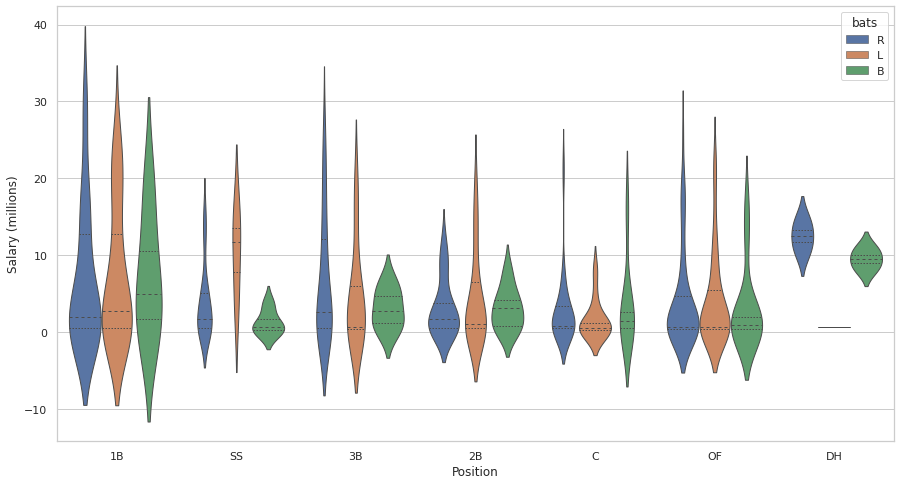

In [133]:
#Visualize the salary distributions by position with batting stance in the 
sns.set_theme(style= "whitegrid")
ax = sns.violinplot(x = stats['pos1'], y = stats['salary'], hue = stats['bats'],
                     inner = 'quart', linewidth = 1)
ax.set_xlabel('Position')
ax.set_ylabel('Salary (millions)')
sns.set(rc = {'figure.figsize':(15,8)})

Text(0, 0.5, 'Salary (millions)')

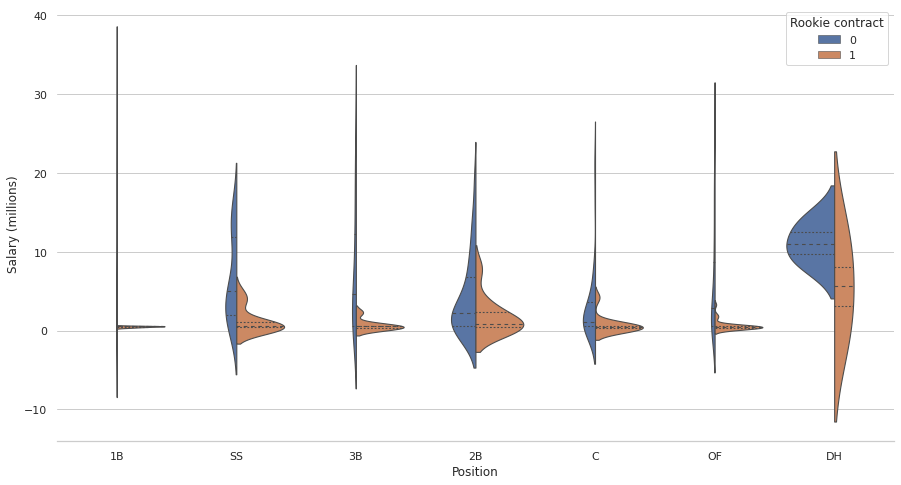

In [134]:
#Explore how rookie contract affects salary distribution by position
sns.set_theme(style= "whitegrid")
ax = sns.violinplot(x = stats['pos1'], y = stats['salary'], hue = stats['Rookie contract'],
                    split = True, inner = 'quart', linewidth = 1.1)
sns.despine(left = True)

sns.set(rc = {'figure.figsize':(15,8)})
ax.set_xlabel('Position')
ax.set_ylabel('Salary (millions)')

Text(0, 0.5, 'Salary (millions)')

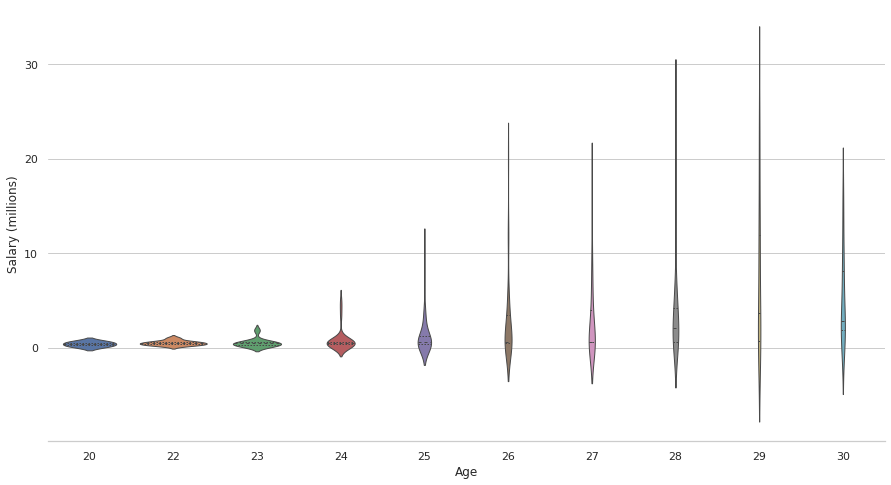

In [135]:
#Visualize the pay distribution for players by age. We can observe that players under
#This is explained by 

stats_restricted = stats.loc[stats['age'] <= 30]
sns.set_theme(style= "whitegrid")
ax = sns.violinplot(x = stats_restricted['age'], y = stats_restricted['salary'],
                     inner = 'quart', linewidth = 1)
sns.despine(left = True)
sns.set(rc = {'figure.figsize':(25,25)})

ax.set_xlabel('Age')
ax.set_ylabel('Salary (millions)')

In [136]:
#Now, read in csv that has one hot encoded categorical variables. We will now normalize the dataframe and do our numerical x numerical visualizations.
stats = pd.read_csv('/content/drive/MyDrive/Data_Science_Projects/2019_stats_clean.csv')

In [137]:
#Drop the only two categorical features in the dataframe: player name and team id
stats.drop(['name','teamID'], axis = 1, inplace = True)

In [138]:
stats.head()

,age,G,tap,AB,R,H,db,tr,HR,RBI,...,position_3B,position_C,position_DH,position_OF,position_SS,throws_L,throws_R,bats_B,bats_L,bats_R
0,32,159.0,693.0,634.0,85.0,180.0,38.0,1.0,33.0,123.0,...,0,0,0,0,0,0,1,0,0,1
1,23,152.0,584.0,531.0,69.0,135.0,25.0,1.0,20.0,52.0,...,0,0,0,0,1,0,1,0,0,1
2,30,111.0,333.0,310.0,42.0,70.0,14.0,0.0,20.0,56.0,...,0,0,0,0,0,0,1,0,1,0
3,29,83.0,234.0,202.0,34.0,55.0,8.0,3.0,5.0,22.0,...,1,0,0,0,0,0,1,1,0,0
4,29,158.0,625.0,556.0,79.0,141.0,33.0,6.0,19.0,82.0,...,0,0,0,0,1,0,1,0,0,1


In [139]:
#Need to normalize all features besides those that are already one hot encoded (those before the last 12).
#We will implement a min-max normalization technique below 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
normalized = scale.fit_transform(stats)
print(normalized)

[[0.6        0.98064516 0.92692828 ... 0.         0.         1.        ]
 [0.15       0.93548387 0.77943166 ... 0.         0.         1.        ]
 [0.5        0.67096774 0.43978349 ... 0.         1.         0.        ]
 ...
 [0.7        0.29032258 0.24627876 ... 0.         0.         1.        ]
 [0.9        0.25806452 0.22733424 ... 1.         0.         0.        ]
 [0.4        0.53548387 0.38024357 ... 0.         0.         1.        ]]


In [140]:
#Convert from numpy array with min-max normalized values to a Pandas Dataframe
stats_normalized = pd.DataFrame(normalized, columns = stats.columns)
stats_normalized.head()

,age,G,tap,AB,R,H,db,tr,HR,RBI,...,position_3B,position_C,position_DH,position_OF,position_SS,throws_L,throws_R,bats_B,bats_L,bats_R
0,0.60,0.980645,0.926928,0.930267,0.629630,0.873786,0.655172,0.1,0.622642,0.976190,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.15,0.935484,0.779432,0.777448,0.511111,0.655340,0.431034,0.1,0.377358,0.412698,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.50,0.670968,0.439783,0.449555,0.311111,0.339806,0.241379,0.0,0.377358,0.444444,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.45,0.490323,0.305819,0.289318,0.251852,0.266990,0.137931,0.3,0.094340,0.174603,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.45,0.974194,0.834912,0.814540,0.585185,0.684466,0.568966,0.6,0.358491,0.650794,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [141]:
#Before creating visualizations to decide which features play 
#a significant role here, we restrict our dataset to players who aren't on rookie contracts.
#We do this because most young players on rookie contracts make around the same amount (regardless of their value based on their stats)
stats_ = stats_normalized.loc[(stats_normalized['Rookie contract'] == 0)]

Analysis of non-rookie position players

In [142]:
#Write a function to plot feature vs. feature so we don't have to repeat our matplotlib code over and over
def scatter_plotxy(dataframe, x, target, color, position):
  ind = dataframe[x]
  dep = dataframe[target]
  plt_1 = plt.figure(figsize=(5,5))
  plt.scatter(ind,dep,s=10, alpha = 0.6, color = color)
  plt.xlabel(x)
  plt.ylabel(target)
  plt.title(target + ' vs. ' + x + ' (' + position + ')')

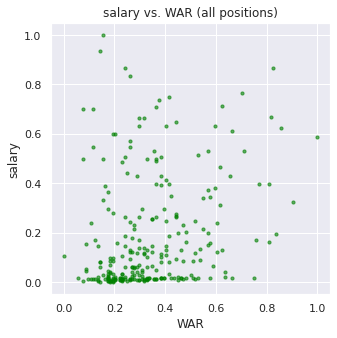

In [143]:
#Visualize what features contribute to salary for position players in the MLB.
import matplotlib.pyplot as plt
scatter_plotxy(stats_,'WAR', 'salary', 'green','all positions')

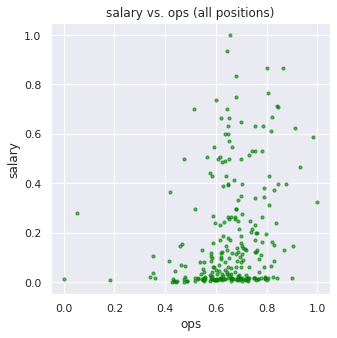

In [144]:
scatter_plotxy(stats_,'ops', 'salary', 'green','all positions')

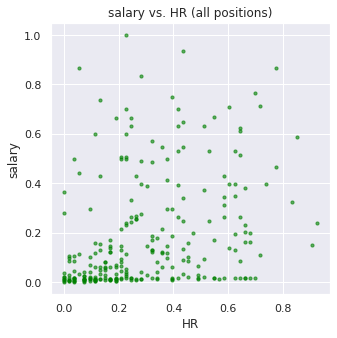

In [145]:
scatter_plotxy(stats_,'HR', 'salary', 'green','all positions')

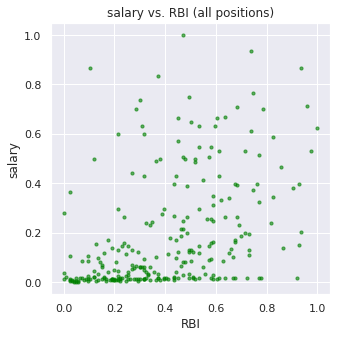

In [146]:
scatter_plotxy(stats_,'RBI', 'salary', 'green','all positions')

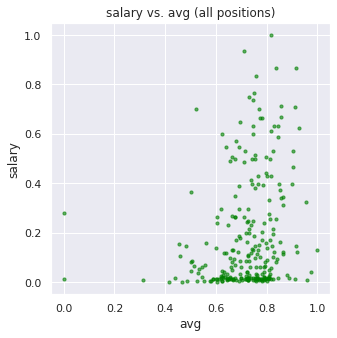

In [147]:
scatter_plotxy(stats_,'avg', 'salary', 'green','all positions')

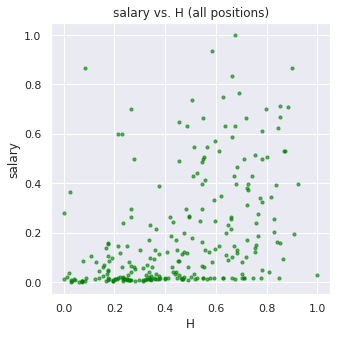

In [148]:
scatter_plotxy(stats_,'H', 'salary', 'green','all positions')

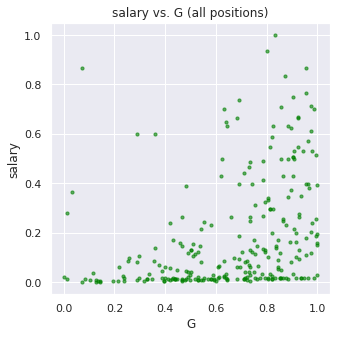

In [149]:
scatter_plotxy(stats_,'G', 'salary', 'green','all positions')

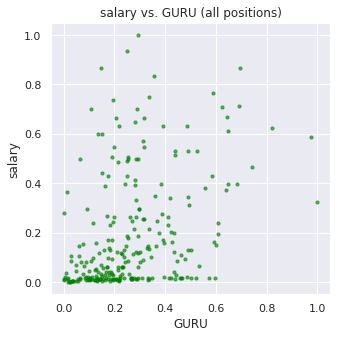

In [150]:
scatter_plotxy(stats_,'GURU', 'salary', 'green','all positions')

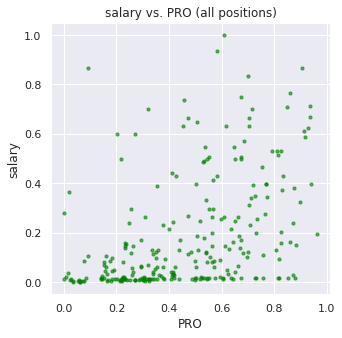

In [151]:
scatter_plotxy(stats_,'PRO', 'salary', 'green','all positions')

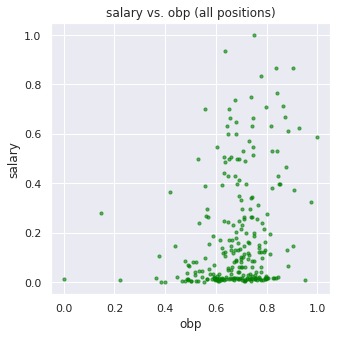

In [153]:
scatter_plotxy(stats_,'obp', 'salary', 'green','all positions')

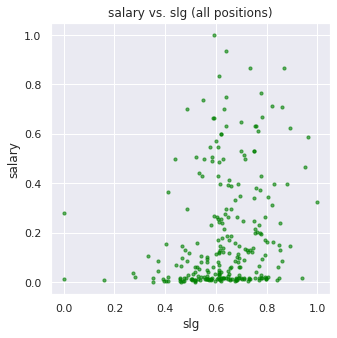

In [154]:
scatter_plotxy(stats_,'slg', 'salary', 'green','all positions')

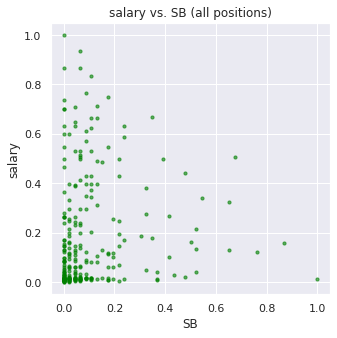

In [155]:
scatter_plotxy(stats_,'SB', 'salary', 'green','all positions')

Position Analysis - First Base

In [39]:
#We will start by doing position wide visualizations to see what features contribute to salary.
#We continue to use the .loc function to filter our results
first_base = stats_normalized.loc[(stats_normalized['position_1B'] == 1) & (stats_normalized['Rookie contract'] == 0)]

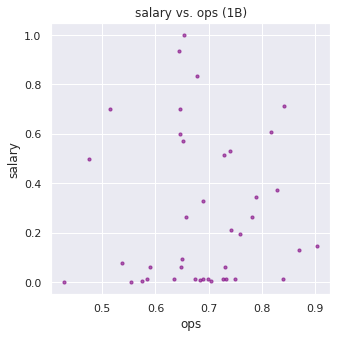

In [156]:
scatter_plotxy(first_base,'ops', 'salary', 'purple','1B')

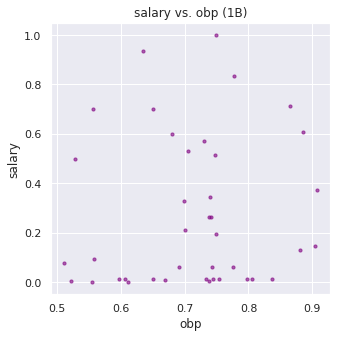

In [157]:
scatter_plotxy(first_base,'obp', 'salary', 'purple','1B')

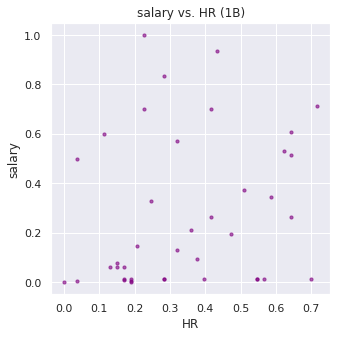

In [158]:
scatter_plotxy(first_base,'HR', 'salary', 'purple','1B')

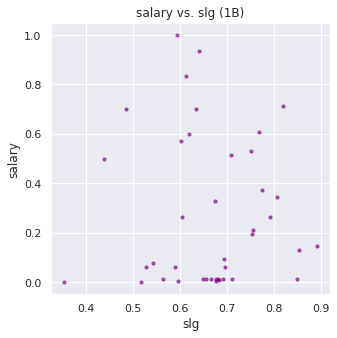

In [159]:
scatter_plotxy(first_base,'slg', 'salary', 'purple','1B')

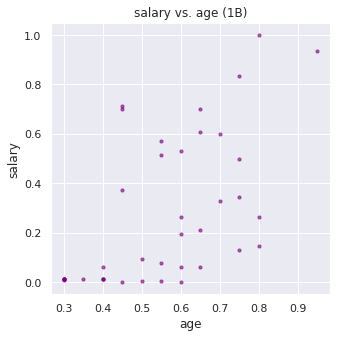

In [160]:
scatter_plotxy(first_base,'age', 'salary', 'purple','1B')

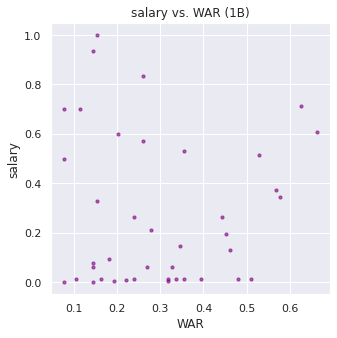

In [161]:
scatter_plotxy(first_base,'WAR', 'salary', 'purple','1B')

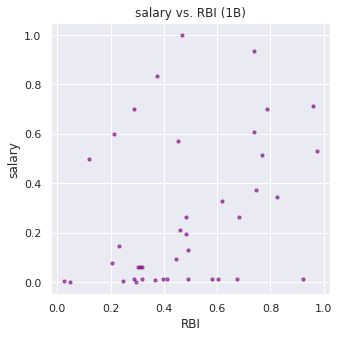

In [162]:
scatter_plotxy(first_base,'RBI', 'salary', 'purple','1B')

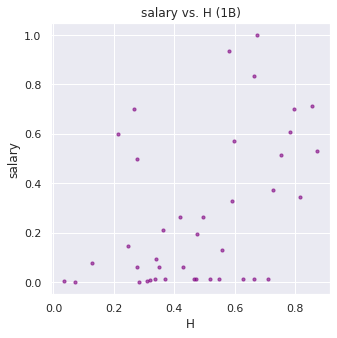

In [163]:
scatter_plotxy(first_base,'H', 'salary', 'purple','1B')

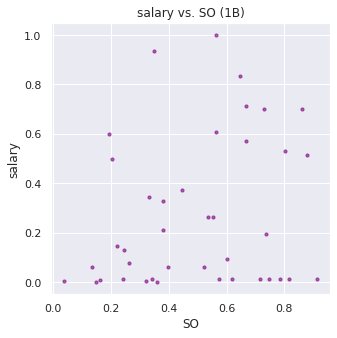

In [164]:
scatter_plotxy(first_base,'SO', 'salary', 'purple','1B')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Salary (millions)')

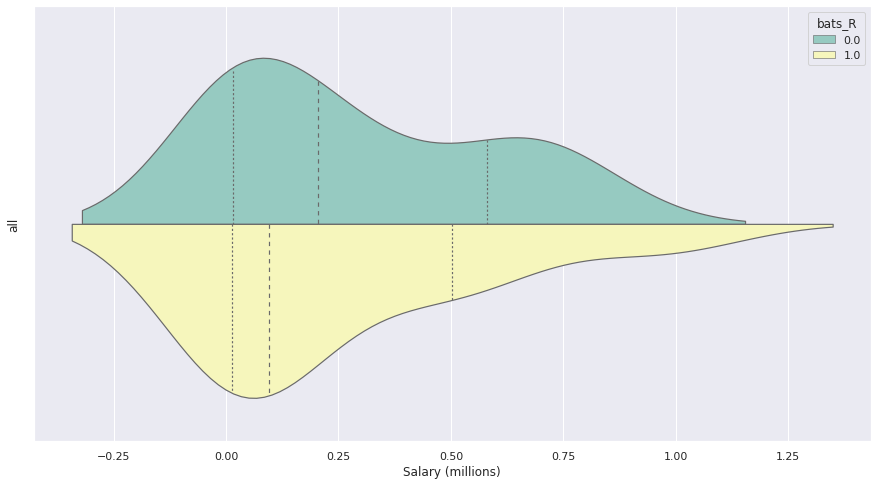

In [49]:
sns.set_theme(style = 'whitegrid')
sns.set(rc = {'figure.figsize':(15, 8)})
first_base['all'] = ''
ax = sns.violinplot(x = first_base['salary'], y = first_base['all'], palette = 'Set3', hue = first_base['bats_R'], split = True, inner = 'quartile', linewidth = 1.2)
ax.set_xlabel('Salary (millions)')

Text(0.5, 0, 'Salary (millions)')

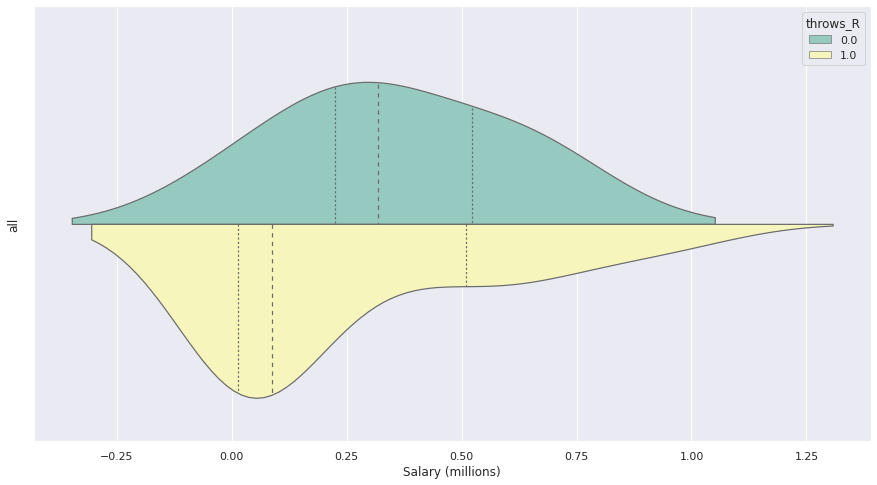

In [50]:
sns.set_theme(style = 'whitegrid')
sns.set(rc = {'figure.figsize':(15, 8)})
ax = sns.violinplot(x = first_base['salary'], y = first_base['all'], palette = 'Set3', hue = first_base['throws_R'], split = True, inner = 'quartile', linewidth = 1.2)
ax.set_xlabel('Salary (millions)')

Position Analysis - Second Base

In [52]:
#Now visualize how different features affect player salary for second baseman
second_b = stats_normalized.loc[(stats_normalized['position_2B'] == 1) & (stats_normalized['Rookie contract'] == 0)]

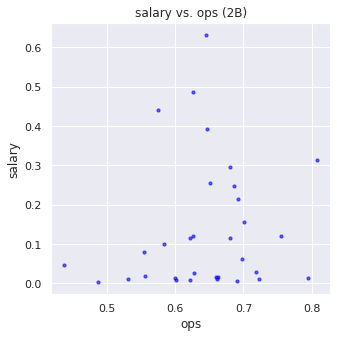

In [53]:
scatter_plotxy(second_b,'ops', 'salary', 'blue','2B')

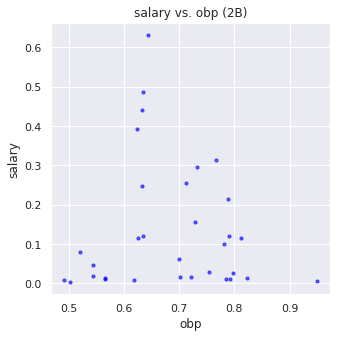

In [54]:
scatter_plotxy(second_b, 'obp', 'salary', 'blue', '2B')

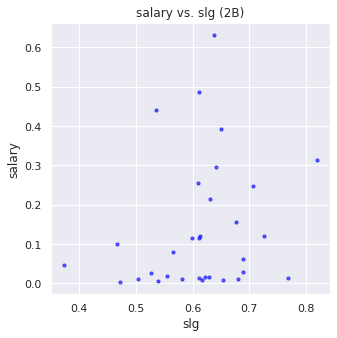

In [55]:
scatter_plotxy(second_b, 'slg', 'salary', 'blue', '2B')

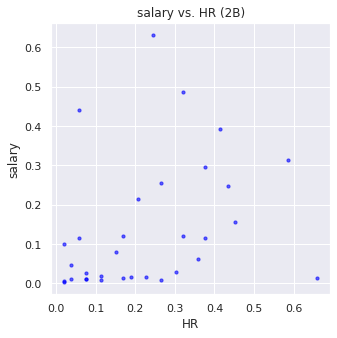

In [56]:
scatter_plotxy(second_b, 'HR', 'salary', 'blue', '2B')

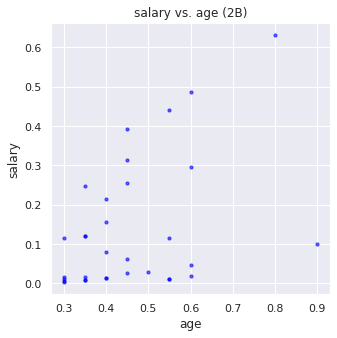

In [57]:
scatter_plotxy(second_b, 'age', 'salary', 'blue', '2B')

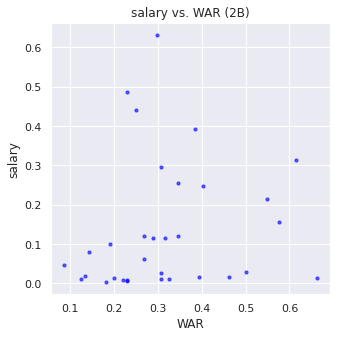

In [58]:
scatter_plotxy(second_b, 'WAR', 'salary', 'blue', '2B')

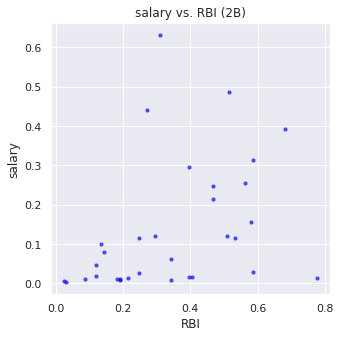

In [59]:
scatter_plotxy(second_b, 'RBI', 'salary', 'blue', '2B')

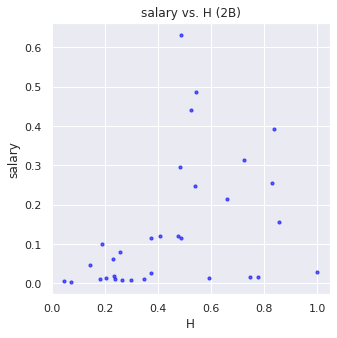

In [60]:
scatter_plotxy(second_b, 'H', 'salary', 'blue', '2B')

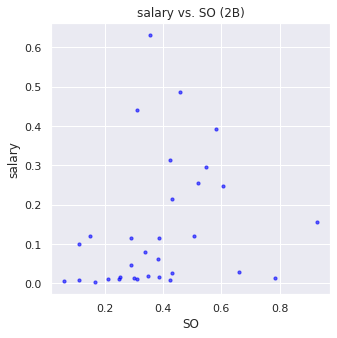

In [61]:
scatter_plotxy(second_b, 'SO', 'salary', 'blue', '2B')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Salary (millions)')

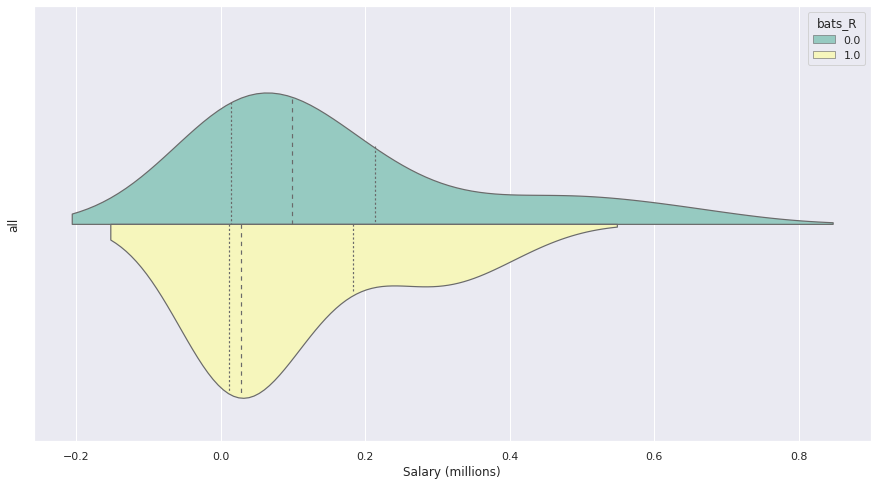

In [62]:
sns.set_theme(style = 'whitegrid')
sns.set(rc = {'figure.figsize':(15, 8)})
second_b['all'] = ''
ax = sns.violinplot(x = second_b['salary'], y = second_b['all'], palette = 'Set3', hue = second_b['bats_R'], split = True, inner = 'quartile', linewidth = 1.2)
ax.set_xlabel('Salary (millions)')

Position Analysis - Third Base

In [63]:
#Now visualize how different features affect player salary for third baseman
third = stats_normalized.loc[(stats_normalized['position_3B'] == 1) & (stats_normalized['Rookie contract'] == 0)]

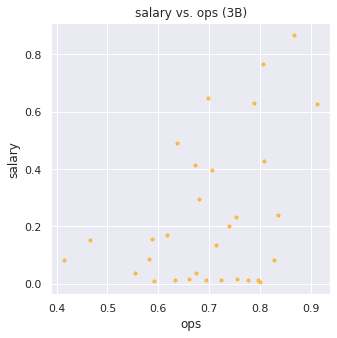

In [64]:
scatter_plotxy(third, 'ops', 'salary', 'orange', '3B')

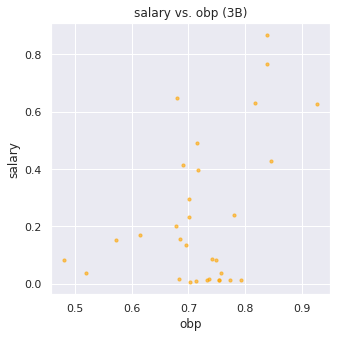

In [65]:
scatter_plotxy(third, 'obp', 'salary', 'orange', '3B')

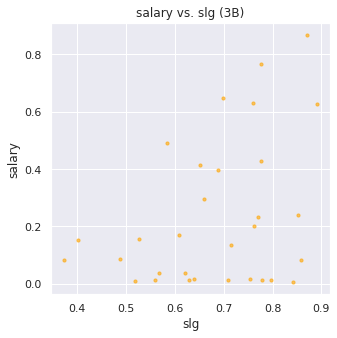

In [66]:
scatter_plotxy(third, 'slg', 'salary', 'orange', '3B')

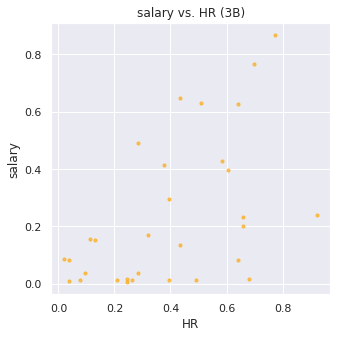

In [67]:
scatter_plotxy(third, 'HR', 'salary', 'orange', '3B')

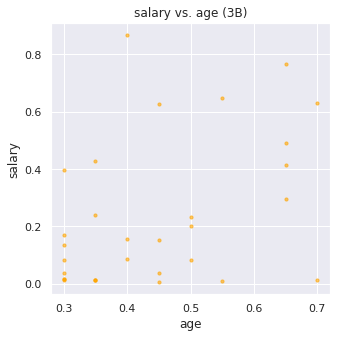

In [68]:
scatter_plotxy(third, 'age', 'salary', 'orange', '3B')

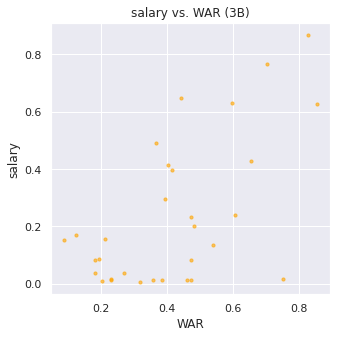

In [69]:
scatter_plotxy(third, 'WAR', 'salary', 'orange', '3B')

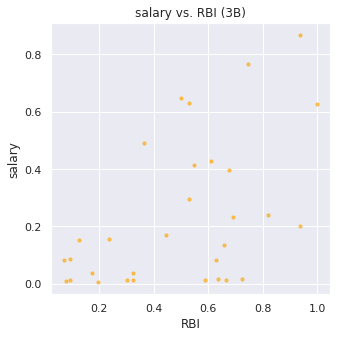

In [70]:
scatter_plotxy(third, 'RBI', 'salary', 'orange', '3B')

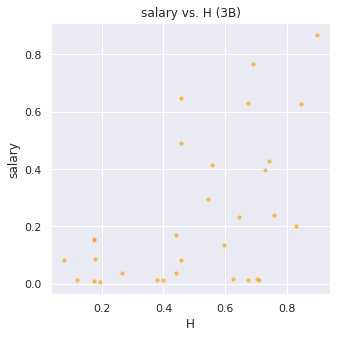

In [71]:
scatter_plotxy(third, 'H', 'salary', 'orange', '3B')

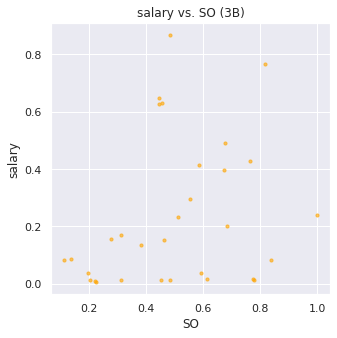

In [72]:
scatter_plotxy(third, 'SO', 'salary', 'orange', '3B')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Salary (millions)')

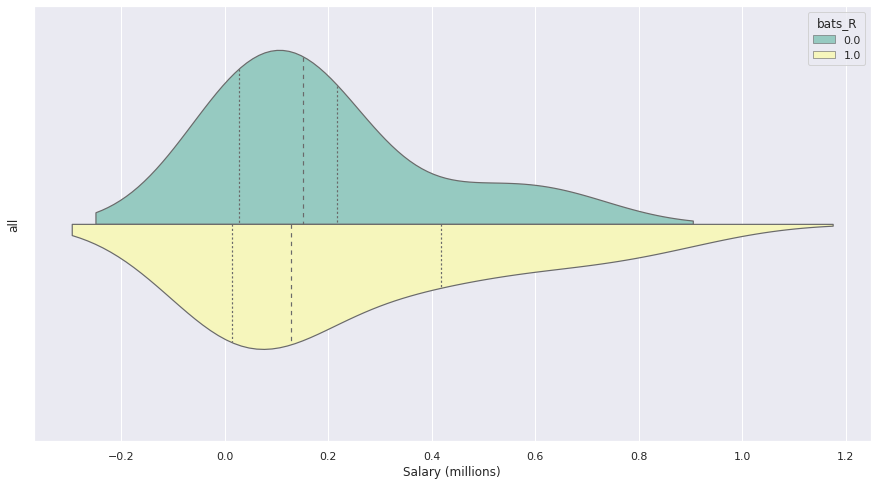

In [73]:
sns.set_theme(style = 'whitegrid')
sns.set(rc = {'figure.figsize':(15, 8)})
third['all'] = ''
ax = sns.violinplot(x = third['salary'], y = third['all'], palette = 'Set3', hue = third['bats_R'], split = True, inner = 'quartile', linewidth = 1.2)
ax.set_xlabel('Salary (millions)')

Position Analysis - Catcher

In [74]:
#Now visualize how different features affect player salary for catchers
catcher = stats_normalized.loc[(stats_normalized['position_C'] == 1) & (stats_normalized['Rookie contract'] == 0)]

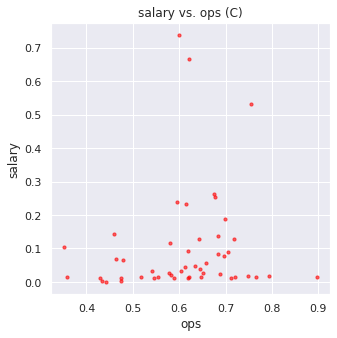

In [75]:
scatter_plotxy(catcher, 'ops', 'salary', 'red', 'C')

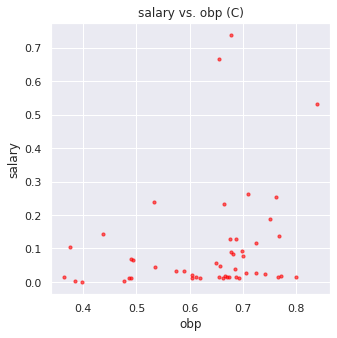

In [76]:
scatter_plotxy(catcher, 'obp', 'salary', 'red', 'C')

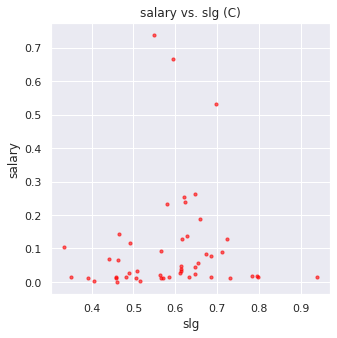

In [77]:
scatter_plotxy(catcher, 'slg', 'salary', 'red', 'C')

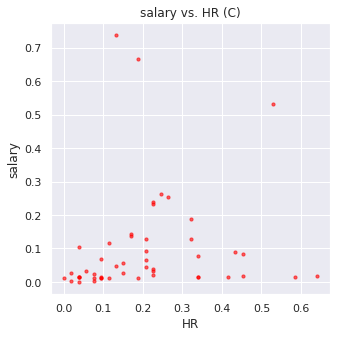

In [78]:
scatter_plotxy(catcher, 'HR', 'salary', 'red', 'C')

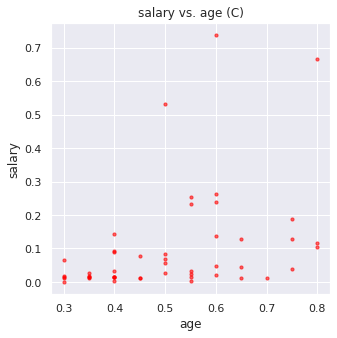

In [79]:
scatter_plotxy(catcher, 'age', 'salary', 'red', 'C')

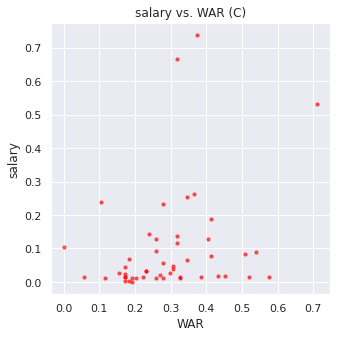

In [80]:
scatter_plotxy(catcher, 'WAR', 'salary', 'red', 'C')

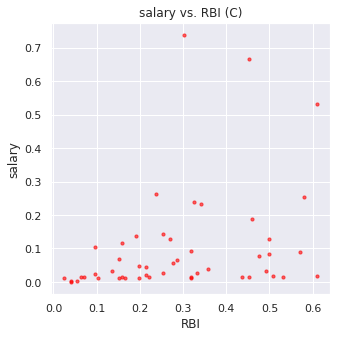

In [81]:
scatter_plotxy(catcher, 'RBI', 'salary', 'red', 'C')

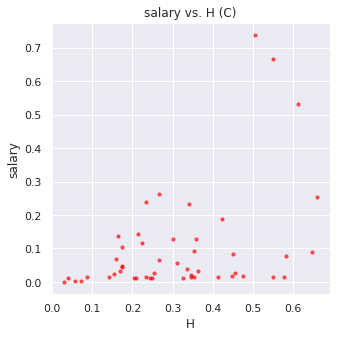

In [82]:
scatter_plotxy(catcher, 'H','salary', 'red','C')

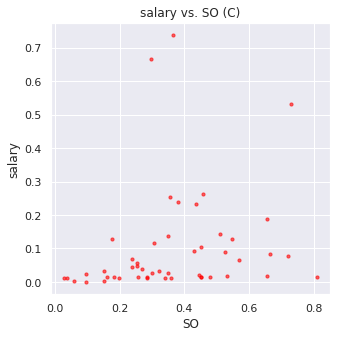

In [83]:
scatter_plotxy(catcher, 'SO','salary', 'red','C')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Salary (millions)')

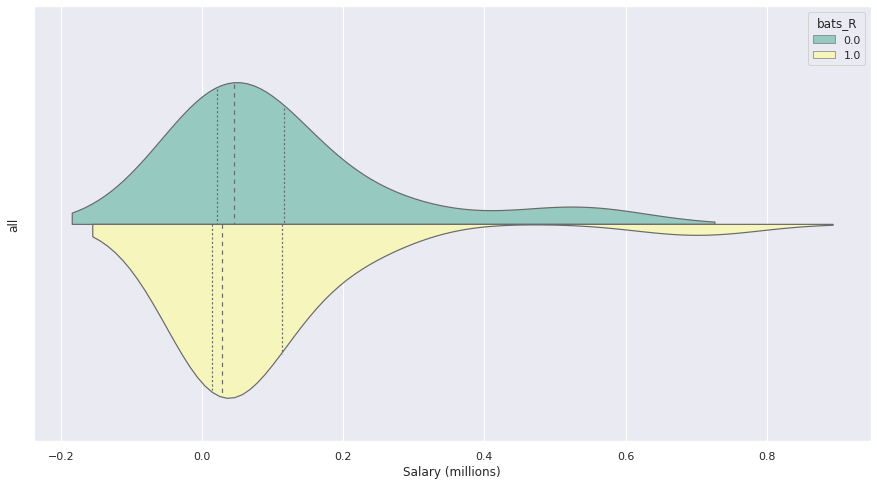

In [84]:
sns.set_theme(style = 'whitegrid')
sns.set(rc = {'figure.figsize':(15, 8)})
catcher['all'] = ''
ax = sns.violinplot(x = catcher['salary'], y = catcher['all'], palette = 'Set3', hue = catcher['bats_R'], split = True, inner = 'quartile', linewidth = 1.2)
ax.set_xlabel('Salary (millions)')

In [85]:
#Now visualize how different stats affect player salary for shortstops
short = stats_normalized.loc[(stats_normalized['position_SS'] == 1) & (stats_normalized['Rookie contract'] == 0)]

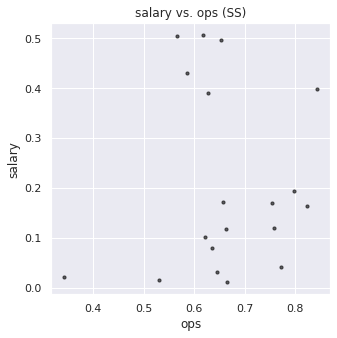

In [86]:
scatter_plotxy(short, 'ops', 'salary', 'black', 'SS')

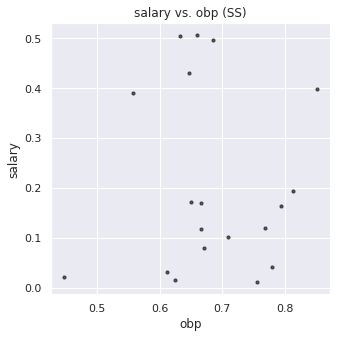

In [87]:
scatter_plotxy(short, 'obp', 'salary', 'black', 'SS')

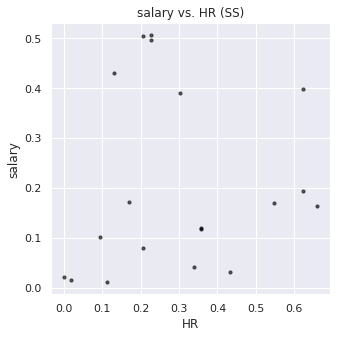

In [88]:
scatter_plotxy(short, 'HR', 'salary', 'black', 'SS')

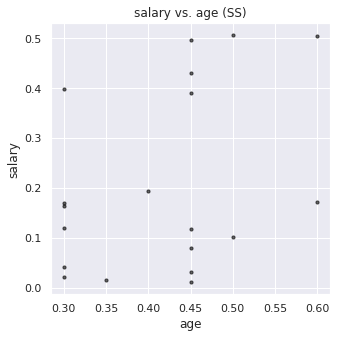

In [89]:
scatter_plotxy(short, 'age', 'salary', 'black', 'SS')

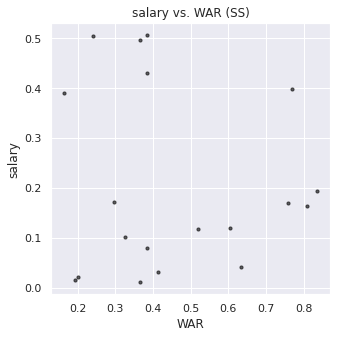

In [90]:
scatter_plotxy(short, 'WAR', 'salary', 'black', 'SS')

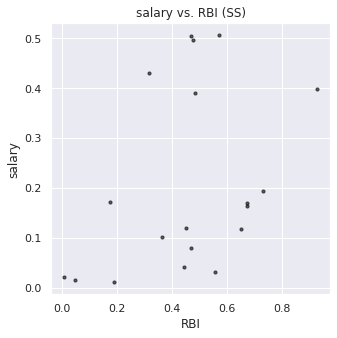

In [91]:
scatter_plotxy(short, 'RBI', 'salary', 'black', 'SS')

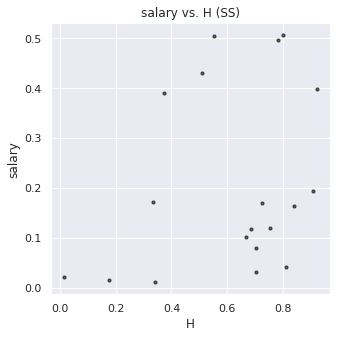

In [92]:
scatter_plotxy(short, 'H', 'salary', 'black', 'SS')

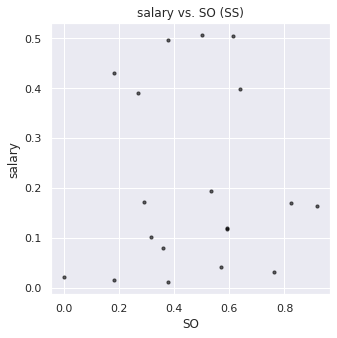

In [93]:
scatter_plotxy(short, 'SO', 'salary', 'black', 'SS')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Salary (millions)')

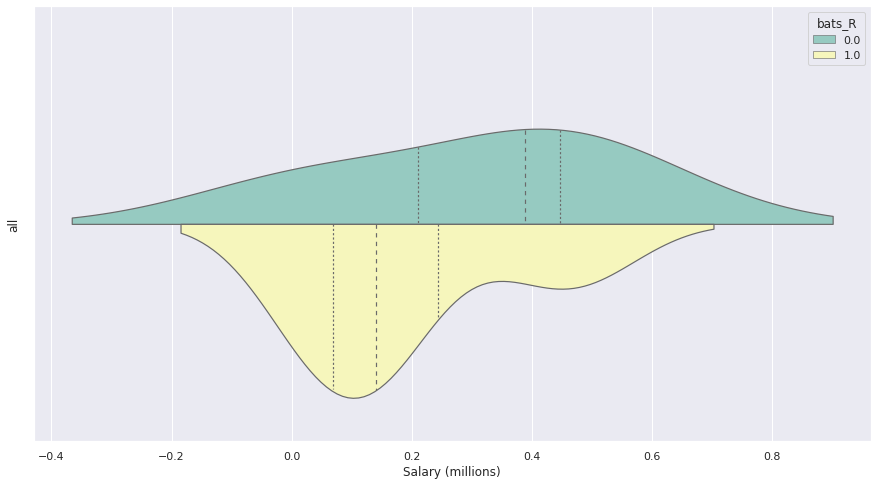

In [94]:
sns.set_theme(style = 'whitegrid')
sns.set(rc = {'figure.figsize':(15, 8)})
short['all'] = ''
ax = sns.violinplot(x = short['salary'], y = short['all'], palette = 'Set3', hue = short['bats_R'], split = True, inner = 'quartile', linewidth = 1.2)
ax.set_xlabel('Salary (millions)')

Position Analysis - Designated Hitter

In [95]:
#Now visualize how different stats affect player salary for designated hitters
dh = stats_normalized.loc[(stats_normalized['position_DH'] == 1) & (stats_normalized['Rookie contract'] == 0)]

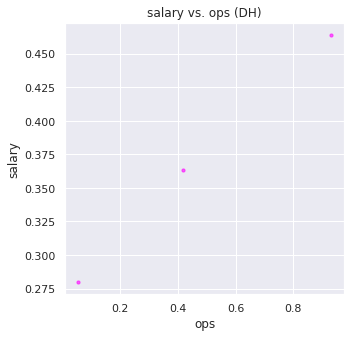

In [96]:
scatter_plotxy(dh, 'ops', 'salary', 'magenta', 'DH')

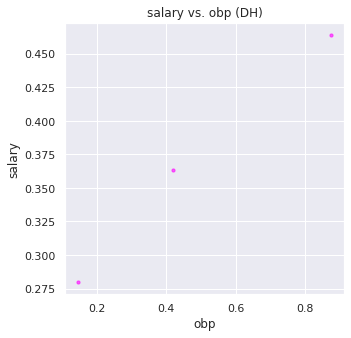

In [97]:
scatter_plotxy(dh, 'obp', 'salary', 'magenta', 'DH')

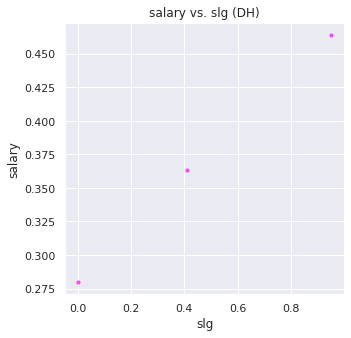

In [98]:
scatter_plotxy(dh, 'slg', 'salary', 'magenta', 'DH')

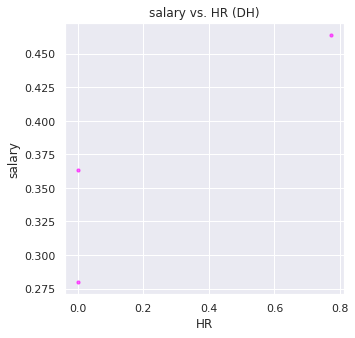

In [99]:
scatter_plotxy(dh, 'HR', 'salary', 'magenta', 'DH')

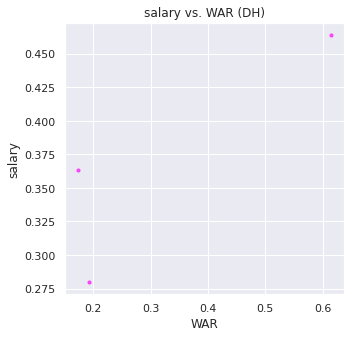

In [100]:
scatter_plotxy(dh, 'WAR', 'salary', 'magenta', 'DH')

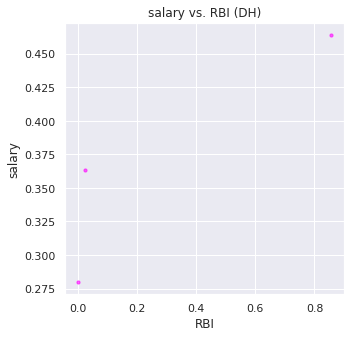

In [101]:
scatter_plotxy(dh, 'RBI', 'salary', 'magenta', 'DH')

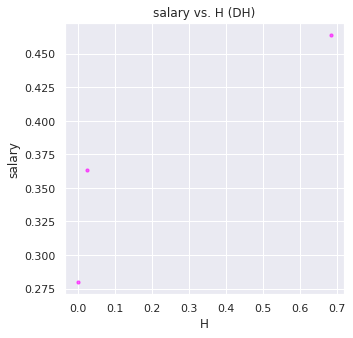

In [102]:
scatter_plotxy(dh,'H', 'salary', 'magenta', 'DH')

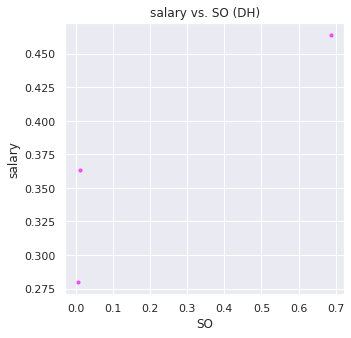

In [103]:
scatter_plotxy(dh,'SO', 'salary', 'magenta', 'DH')

Position Analysis - Outfielders

In [104]:
outfield = stats_normalized.loc[(stats_normalized['position_OF'] == 1) & (stats_normalized['Rookie contract'] == 0)]

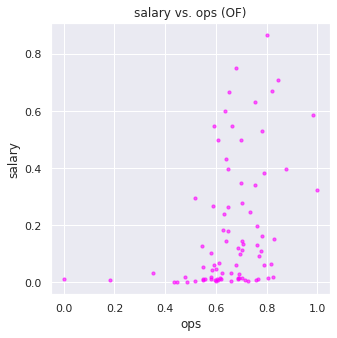

In [105]:
scatter_plotxy(outfield,'ops', 'salary', 'magenta', 'OF')

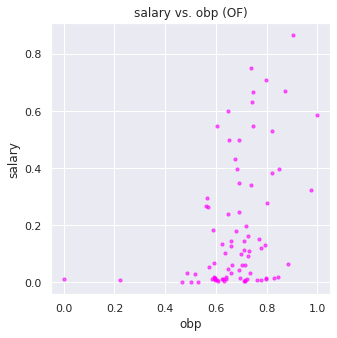

In [106]:
scatter_plotxy(outfield,'obp', 'salary', 'magenta', 'OF')

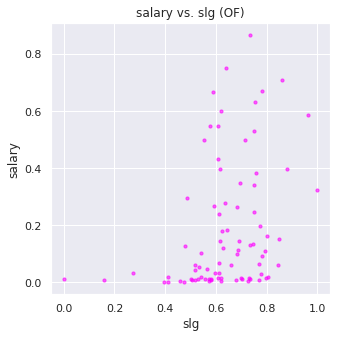

In [107]:
scatter_plotxy(outfield,'slg', 'salary', 'magenta', 'OF')

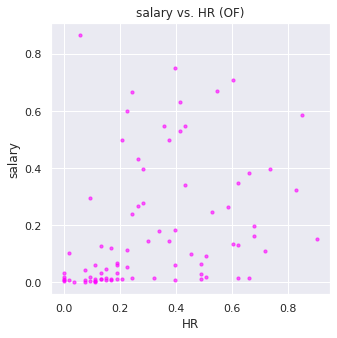

In [108]:
scatter_plotxy(outfield,'HR', 'salary', 'magenta', 'OF')

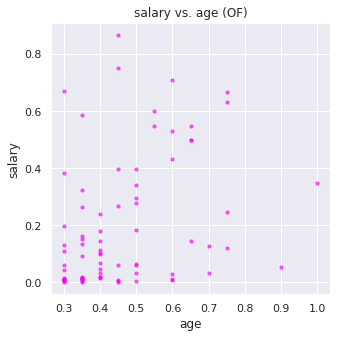

In [109]:
scatter_plotxy(outfield,'age', 'salary', 'magenta', 'OF')

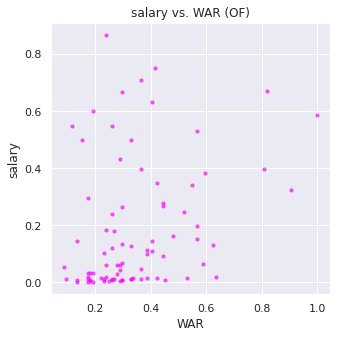

In [110]:
scatter_plotxy(outfield,'WAR', 'salary', 'magenta', 'OF')

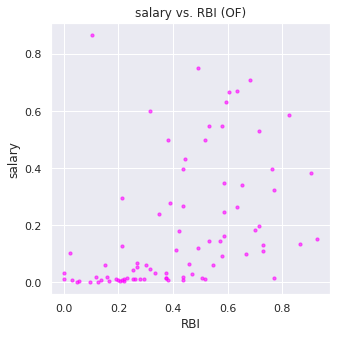

In [111]:
scatter_plotxy(outfield,'RBI', 'salary', 'magenta', 'OF')

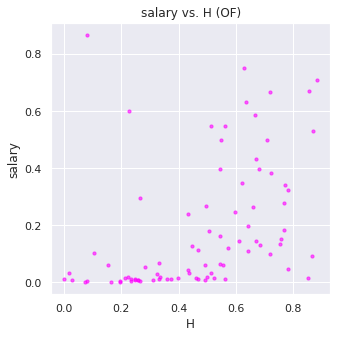

In [112]:
scatter_plotxy(outfield,'H', 'salary', 'magenta', 'OF')

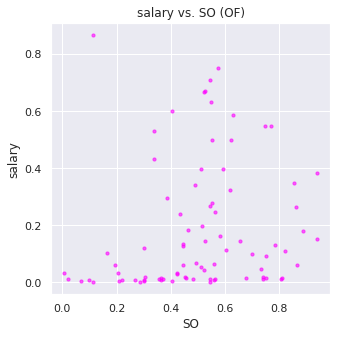

In [113]:
scatter_plotxy(outfield,'SO', 'salary', 'magenta', 'OF')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Salary (millions)')

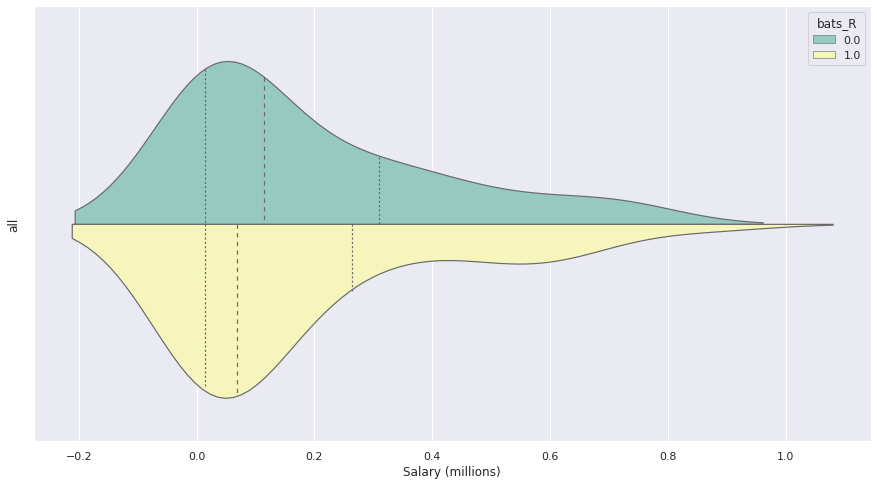

In [114]:
sns.set_theme(style = 'whitegrid')
sns.set(rc = {'figure.figsize':(15, 8)})
outfield['all'] = ''
ax = sns.violinplot(x = outfield['salary'], y = outfield['all'], palette = 'Set3', hue = outfield['bats_R'], split = True, inner = 'quartile', linewidth = 1.2)
ax.set_xlabel('Salary (millions)')

Text(0.5, 0, 'Salary (millions)')

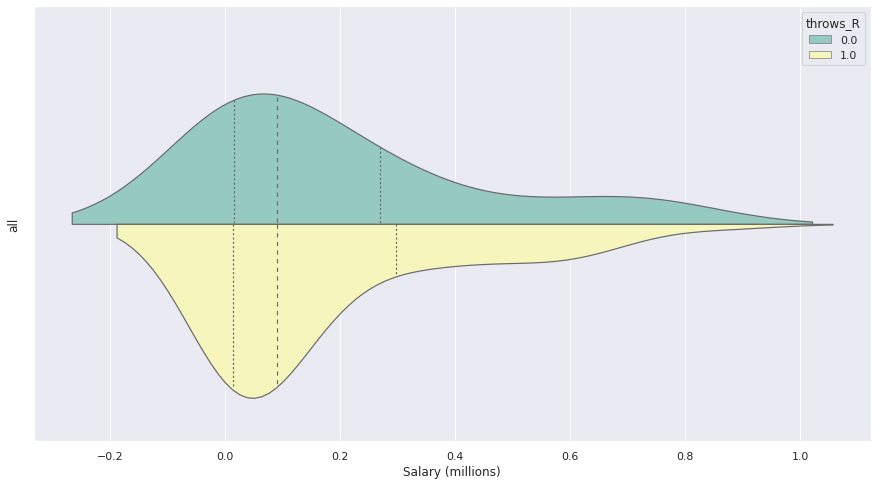

In [115]:
sns.set_theme(style = 'whitegrid')
sns.set(rc = {'figure.figsize':(15, 8)})
ax = sns.violinplot(x = outfield['salary'], y = outfield['all'], palette = 'Set3', hue = outfield['throws_R'], split = True, inner = 'quartile', linewidth = 1.2)
ax.set_xlabel('Salary (millions)')